In [1]:
from IPython.core.display import HTML
HTML("""
<style>

div.cell { /* Tunes the space between cells */
margin-top:1em;
margin-bottom:1em;
}

div.text_cell_render h1 { /* Main titles bigger, centered */
font-size: 2.0em;
line-height:1.6em;
text-align:center;
}

div.text_cell_render h2 { /*  Parts names nearer from text */
margin-bottom: 1em;
text-align:center;
}


div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.2em;
line-height:1.2em;
padding-left:1em;
padding-right:3em;
}
</style>
""")

# Let's implement Logistic Regression


```
    Section 2.1: Apply LR using API of Scikit-Learn 
    
        Step 2.1.1: Import dependencies
    
        Step 2.1.2: Load data
    
        Step 2.1.3: Preprocessing
    
        Step 2.1.4: Split data set into training and testing
        
        Step 2.1.5: Train model using Scikit-learn's Logistic Regression
        
        Step 2.1.6: Visualize the Dataset
```   
   
   

```


     Section 2.2: Apply LR from scratch
    
        Step 2.2.1: Define sigmoid or logistic function
    
        Step 2.2.2: Define hypothesis function
    
        Step 2.2.3: Define cost function 
        
        Step 2.2.4: Define cost function derivative as well as calculating error
        
        Step 2.2.5: Get the updated theta value by calculating gradient descent
        
        Step 2.2.6: Define helper function to run Logistic Regression
        
        Step 2.2.7: Compare our Implementation with Scikit-Learn API
        
        Step 2.2.8: Run our own LR implementation
           
    

```

## Section 2.1: Apply LR using API of Scikit-Learn 

### Import dependencies


In [2]:
# for Python 2: use print only as a function
from __future__ import print_function

import math
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from numpy import loadtxt, where
from pylab import scatter, show, legend, xlabel, ylabel

### Load Dataset

In [3]:
# scale larger positive values and bring them to between -1,1 depending on the largest value in the data
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
df = pd.read_csv("./data/LR_data1.csv", header=0)

### Preprocessing

In [4]:
# clean up data

df.columns = ["grade1","grade2","label"]
x = df["label"].map(lambda x: float(x.rstrip(';')))

In [5]:
# formats the input data into two arrays, one of independant variables and one of the dependant variable
X = df[["grade1","grade2"]]
X = np.array(X)
X = min_max_scaler.fit_transform(X)
Y = df["label"].map(lambda x: float(x.rstrip(';')))
Y = np.array(Y)

In [6]:
## if want to create a new clean dataset 

#X = pd.DataFrame.from_records(X,columns=['grade1','grade2'])
#X.insert(2,'label',Y)
#X.to_csv('./data/LR_data2.csv')

### Training and Testing Split

In [7]:
# creating testing and training set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33)

### Train using Scikit-learn's Logistic Regression

In [8]:
# train scikit learn model 
clf = LogisticRegression()
clf.fit(X_train,Y_train)
print ('score Scikit learn: ', '{:.5f}%'.format(clf.score(X_test,Y_test)*100))

score Scikit learn:  87.87879%


### Visualize the dataset

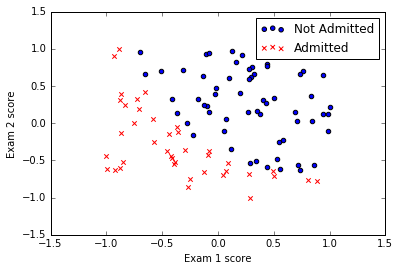

In [9]:
# visualize data, uncomment "show()" to run it
pos = where(Y == 1)
neg = where(Y == 0)
scatter(X[pos, 0], X[pos, 1], marker='o', c='b')
scatter(X[neg, 0], X[neg, 1], marker='x', c='r')
xlabel('Exam 1 score')
ylabel('Exam 2 score')
legend(['Not Admitted', 'Admitted'])
show()

## Section 2.2: Apply LR from scratch

### Define sigmoid or logistic function

In [10]:
##The sigmoid function adjusts the cost function hypothesis to adjust the algorithm proportionally 
##for worse estimations
def Sigmoid(z):
    G_of_Z = float(1.0 / float((1.0 + math.exp(-1.0*z))))
    return G_of_Z 

### Define hypothesis function

In [11]:
##The hypothesis is the linear combination of all the known factors x[i] and their current estimated coefficients theta[i] 
##This hypothesis will be used to calculate each instance of the Cost Function

def Hypothesis(theta, x):
    z = 0
    for i in range(len(theta)):
        z += x[i]*theta[i]
    return Sigmoid(z)

### Define cost function

In [12]:
##For each member of the dataset, the result (Y) determines which variation of the cost function is used
##The Y = 0 cost function punishes high probability estimations, and the Y = 1 it punishes low scores
##The "punishment" makes the change in the gradient of ThetaCurrent - Average(CostFunction(Dataset)) greater

def Cost_Function(X,Y,theta,m):
    sumOfErrors = 0
    for i in range(m):
        xi = X[i]
        hi = Hypothesis(theta,xi)
        if Y[i] == 1:
            error = Y[i] * math.log(hi)
        elif Y[i] == 0:
            error = (1-Y[i]) * math.log(1-hi)
        sumOfErrors += error
    const = -1/m
    J = const * sumOfErrors
    print ('cost is ', J )
    return J

### Define cost function derivative as well as calculating error

In [13]:
##This function creates the gradient component for each Theta value 
##The gradient is the partial derivative by Theta of the current value of theta minus 
##a "learning speed factor aplha" times the average of all the cost functions for that theta
##For each Theta there is a cost function calculated for each member of the dataset
def Cost_Function_Derivative(X,Y,theta,j,m,alpha):
    sumErrors = 0
    for i in range(m):
        xi = X[i]
        xij = xi[j]
        hi = Hypothesis(theta,X[i])
        error = (hi - Y[i])*xij
        sumErrors += error
    m = len(Y)
    constant = float(alpha)/float(m)
    J = constant * sumErrors
    return J


### Get the updated theta value by calculating gradient descent

In [14]:
##For each theta, the partial differential 
##The gradient, or vector from the current point in Theta-space (each theta value is its own dimension) to the more accurate point, 
##is the vector with each dimensional component being the partial differential for each theta value
def Gradient_Descent(X,Y,theta,m,alpha):
    new_theta = []
    constant = alpha/m
    for j in range(len(theta)):
        CFDerivative = Cost_Function_Derivative(X,Y,theta,j,m,alpha)
        #print(theta[j])
        new_theta_value = theta[j] - CFDerivative
        new_theta.append(new_theta_value)
    return new_theta

### Define helper function to run Logistic Regression

In [15]:
##The high level function for the LR algorithm which, for a number of steps (num_iters) finds gradients which take 
##the Theta values (coefficients of known factors) from an estimation closer (new_theta) to their "optimum estimation" which is the
##set of values best representing the system in a linear combination model
def Logistic_Regression(X,Y,alpha,theta,num_iters):
    m = len(Y)
    for x in range(num_iters):
        new_theta = Gradient_Descent(X,Y,theta,m,alpha)
        theta = new_theta
        if x % 100 == 0:
            #here the cost function is used to present the final hypothesis of the model in the same form for each gradient-step iteration
            Cost_Function(X,Y,theta,m)
            #print ('theta ', theta)
            #print ('cost is ', Cost_Function(X,Y,theta,m))
    Declare_Winner(theta)

### Compare our Implementation with Scikit-Learn API

In [16]:
##This method compares the accuracy of the model generated by the scikit library with the model generated by this implementation
def Declare_Winner(theta):
    score = 0
    winner = ""
    #first scikit LR is tested for each independent var in the dataset and its prediction is compared against the dependent var
    #if the prediction is the same as the dataset measured value it counts as a point for thie scikit version of LR
    scikit_score = clf.score(X_test,Y_test)
    length = len(X_test)
    for i in range(length):
        prediction = round(Hypothesis(X_test[i],theta))
        answer = Y_test[i]
        if prediction == answer:
            score += 1
    #the same process is repeated for the implementation from this module and the scores compared to find the higher match-rate
    my_score = float(score) / float(length)
    if my_score > scikit_score:
        print ('You won!')
    elif my_score == scikit_score:
        print ('Its a tie!')
    else:
        print ('Scikit won.. :(')
    print ('Your score: ', my_score)
    print ('Scikits score: ', scikit_score)

### Run our own LR implementation

In [17]:
# These are the initial guesses for theta as well as the learning rate of the algorithm
# A learning rate too low will not close in on the most accurate values within a reasonable number of iterations
# An alpha too high might overshoot the accurate values or cause irratic guesses
# Each iteration increases model accuracy but with diminishing returns, 
# and takes a signficicant coefficient times O(n)*|Theta|, n = dataset length
initial_theta = [0,0]
alpha = 0.1
iterations = 1000
Logistic_Regression(X,Y,alpha,initial_theta,iterations)

cost is  0.6886958174712052
cost is  0.45043928326843835
cost is  0.37210396400568835
cost is  0.33493174290971306
cost is  0.3134393548415864
cost is  0.2995143683386589
cost is  0.2898100759552151
cost is  0.2826976528686292
cost is  0.2772893938976962
cost is  0.2730601259267772
Scikit won.. :(
Your score:  0.8484848484848485
Scikits score:  0.8787878787878788
